In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [25]:
JanAirBnb = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2018-01-10/data/listings.csv.gz')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
OctAirBnb = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2018-10-03/data/listings.csv.gz")
OctAirBnb.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181003014905,2018-10-03,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,https://www.airbnb.com/rooms/2539,20181003014905,2018-10-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.23
2,2595,https://www.airbnb.com/rooms/2595,20181003014905,2018-10-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,https://www.airbnb.com/rooms/3330,20181003014905,2018-10-03,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,https://www.airbnb.com/rooms/3647,20181003014905,2018-10-03,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN


In [3]:
OctAirBnb.shape

(50041, 96)

In [4]:
OctAirBnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [28]:
OctAirBnb.drop(labels=['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street', 'square_feet',
       
       'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
       'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'], axis=1,inplace=True)


In [30]:
JanAirBnb.drop(labels=['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
        'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'square_feet',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
       'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'], axis=1,inplace=True)

In [31]:
JanAirBnb.head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,latitude,longitude,price,weekly_price,monthly_price
0,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",40.685559,-73.940650,$38.00,NaN,NaN
1,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",40.683917,-73.934671,$90.00,$490.00,NaN
2,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",40.687344,-73.938055,$90.00,$550.00,"$2,200.00"
3,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",40.694073,-73.945514,$200.00,"$1,500.00",NaN
4,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,"Brooklyn, NY",40.679685,-73.907642,$50.00,NaN,NaN


In [10]:
OctAirBnb.head()

,smart_location,latitude,longitude,square_feet,price,weekly_price,monthly_price
0,"New York, NY",40.799205,-73.953676,NaN,$59.00,$720.00,"$1,690.00"
1,"Brooklyn , NY",40.647486,-73.972370,NaN,$149.00,$299.00,$999.00
2,"New York, NY",40.753621,-73.983774,NaN,$225.00,"$1,995.00",NaN
3,"Brooklyn, NY",40.708558,-73.942362,NaN,$70.00,$650.00,"$1,900.00"
4,"New York, NY",40.809018,-73.941902,NaN,$150.00,NaN,NaN


In [32]:
airbnb = pd.concat([OctAirBnb,JanAirBnb], axis=0, join='outer')

In [33]:
airbnb.head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,latitude,longitude,price,weekly_price,monthly_price
0,Harlem,Harlem,Manhattan,"New York, NY",40.799205,-73.953676,$59.00,$720.00,"$1,690.00"
1,Kensington,Kensington,Brooklyn,"Brooklyn , NY",40.647486,-73.972370,$149.00,$299.00,$999.00
2,Midtown,Midtown,Manhattan,"New York, NY",40.753621,-73.983774,$225.00,"$1,995.00",NaN
3,Williamsburg,Williamsburg,Brooklyn,"Brooklyn, NY",40.708558,-73.942362,$70.00,$650.00,"$1,900.00"
4,Harlem,Harlem,Manhattan,"New York, NY",40.809018,-73.941902,$150.00,NaN,NaN


In [34]:
#create a new column Coordinates as a tuple
airbnb['Coordinates'] = list(zip(airbnb.longitude, airbnb.latitude))

In [35]:
#we transform tuples to Point 
airbnb['Coordinates'] = airbnb['Coordinates'].apply(Point)

In [36]:
# create geodataframe
airBnBgdf = gpd.GeoDataFrame(airbnb, geometry='Coordinates')

In [37]:
airBnBgdf.head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,smart_location,latitude,longitude,price,weekly_price,monthly_price,Coordinates
0,Harlem,Harlem,Manhattan,"New York, NY",40.799205,-73.953676,$59.00,$720.00,"$1,690.00",POINT (-73.95367574543542 40.79920479936168)
1,Kensington,Kensington,Brooklyn,"Brooklyn , NY",40.647486,-73.972370,$149.00,$299.00,$999.00,POINT (-73.97236954007957 40.64748608166989)
2,Midtown,Midtown,Manhattan,"New York, NY",40.753621,-73.983774,$225.00,"$1,995.00",NaN,POINT (-73.98377381114605 40.75362072657246)
3,Williamsburg,Williamsburg,Brooklyn,"Brooklyn, NY",40.708558,-73.942362,$70.00,$650.00,"$1,900.00",POINT (-73.94236227640226 40.70855778333159)
4,Harlem,Harlem,Manhattan,"New York, NY",40.809018,-73.941902,$150.00,NaN,NaN,POINT (-73.94190208041947 40.80901784905571)


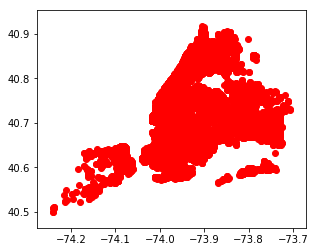

In [23]:
airBnBgdf.plot( color='red')

In [24]:
airBnBgdf.smart_location.unique()

array(['New York, NY', 'Brooklyn , NY', 'Brooklyn, NY', 'Queens, NY',
       'Bronx, NY', 'Long Island City, NY', 'Staten Island, NY',
       'Astoria, NY', 'Rockaway Beach, NY', 'Woodside, NY', 'Jamaica, NY',
       'Long Island , NY', 'Wadsworth Terrace, Manhattan, New York, NY',
       'Elmhurst, NY', 'Rego Park, NY', 'Riverdale , NY', 'Briarwood, NY',
       'Kips Bay, NY', 'Jackson Heights, NY', 'Flushing, NY',
       'Manhattan, NY', 'MANHATTAN , NY', 'Park Slope, Brooklyn, NY',
       'Astoria , NY', 'Kew Gardens, NY', 'Sunnyside, NY', 'ASTORIA, NY',
       'long island city, NY', 'NY , NY', 'Williansbrug, Brooklyn, NY',
       'Bushwick, Brooklyn, NY', 'NY', 'New York , NY', 'Sunnyside , NY',
       'Greenpoint, Brooklyn, NY', 'Staten Island , NY',
       'LONG ISLAND CITY, NY', 'bronx, NY', 'Rockaway beach, NY',
       'Whitestone, NY', 'woodside, NY', 'East Williamsburg, NY',
       'Astoria, Queens, NY', 'Woodhaven, NY', 'Far Rockaway, NY',
       'Forest Hills, NY', 'Harlem

In [40]:
airBnBgdf.to_file(driver = 'ESRI Shapefile', filename='airbnbGBF')